## Importing necessary Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## The data

In [16]:
#Read in the data set as a pandas dataframe

data = pd.read_excel("C:/Users/dell/Desktop/DATA_XYZ.xlsx")

In [17]:
#Look at the first 5 rows of data
data.head(5)

,id,XYZ_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [18]:
#look at the shape of the data 
data.shape

(2544, 16)

We can see that there are 2544 rows of data which means we have information of 2544 XYZ fellows and 16 columns which are the features of the fellow/candiate. 

In [19]:
#Look at the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   XYZ_status                   2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

Looking at the information, it looks like the data types of the columns look to be correct apart from categorical data being stored as objects. However, there seem to be some missing information. Therefore, let us look more into the missing data

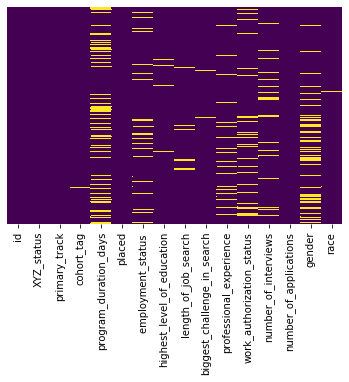

In [20]:
#plot a heatmap to view accurately the amount of missing data
sns.heatmap(data.isnull(), yticklabels= False, cbar= False, cmap = 'viridis')

From the heatmap, it is visually clear that program duration days is missing out on a lot of values because many of the fellows are currently enrolled in the Pathrise program so we do not have a definite value from that. Other than that, Gender seems to be missing a lot of values. This could be because many people do not want to self identify. 


In [21]:
#Looking at the exact number of missing values for each column.
data.isnull().sum()



id                               0
XYZ_status                       0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [22]:
#Lets look at how much percentage of the data for each column is missing

percentage_missing = 100 * data.isnull().sum() / len(data)
percentage_missing_df = pd.DataFrame({'Percentage missing': percentage_missing}, )
percentage_missing_df

,Percentage missing
id,0.000000
XYZ_status,0.000000
primary_track,0.000000
cohort_tag,0.314465
program_duration_days,24.213836
placed,0.000000
employment_status,9.001572
highest_level_of_education,2.279874
length_of_job_search,2.908805
biggest_challenge_in_search,0.943396


This tells us that 24.21% of the data consist of current fellows. Gender has 19% missing values which should not be a problem because, we can just create a new category called as Not Defined for it. 

In [23]:
#Descriptive Statistics for numerical data

data.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


## Data Preparation and Feature Engineering

### Data Cleaning

In [24]:
#1. Cohort Tag - It does not seem like this is an extremely useful variable in modeling whether or not a fellow will be 
#placed and how long it will take to place the fellow. Remove variable

data.drop('cohort_tag', inplace = True, axis = 1)

In [25]:
#2. Drop the id column of fellow - Does not provide value to modelling
data.drop('id', inplace = True, axis = 1)

In [26]:
#3.look at biggest challenge in Job search

data['biggest_challenge_in_search'].value_counts()


Hearing back on my applications         1002
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
Name: biggest_challenge_in_search, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   XYZ_status                   2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   program_duration_days        1928 non-null   float64
 3   placed                       2544 non-null   int64  
 4   employment_status            2315 non-null   object 
 5   highest_level_of_education   2486 non-null   object 
 6   length_of_job_search         2470 non-null   object 
 7   biggest_challenge_in_search  2520 non-null   object 
 8   professional_experience      2322 non-null   object 
 9   work_authorization_status    2260 non-null   object 
 10  number_of_interviews         2326 non-null   float64
 11  number_of_applications       2544 non-null   int64  
 12  gender                       2052 non-null   object 
 13  race              

In [29]:
#Convert appropriate columns to categorical columns
categorical_columns = data[['XYZ_status','primary_track','placed','employment_status ', 'highest_level_of_education',
                            'length_of_job_search', 'biggest_challenge_in_search','professional_experience', 'work_authorization_status',
                           'gender', 'race']]

for i in categorical_columns:
    data[i] = data[i].astype('category')

Since our data set is extremely small, I do not want to drop a lot of rows where the values are missing. I will focus on imputing certain values per column after analyzing their value counts

In [30]:
#Now let us focus on imputing missing values to the categorical columns

#1. For columns such as :
# Highest level of education, length of job search, biggest challenge in search,work authorization status, race
#we can jusut assing the most common category to the missing values since the most frequent classes are significantly larger

most_common_impute = ['highest_level_of_education','length_of_job_search', 'biggest_challenge_in_search',
                      'work_authorization_status','race']

for i in most_common_impute:
    data[i] = data[i].fillna(data[i].value_counts().index[0])


In [31]:
#Here, I just look at value counts to analyze see if a siginificant class stands out and then we can impute most frequent class 
#to the missing value


#data['gender'].value_counts()

It is hard to impute missing values for professional experience and employment status with the most frequent occurence since one category does not really dominate the other. For these, I will create a new class called unknown.

In [32]:
#Create a new class called unkown which could give us valuable information too.
data['employment_status '] = data['employment_status '].cat.add_categories('Unknown')
data['employment_status '].fillna(value = "Unknown", inplace = True)

data['professional_experience'] = data['professional_experience'].cat.add_categories('Unknown')
data['professional_experience'].fillna(value = "Unknown", inplace = True)


In [33]:
#Impute missing value number of interviews with mean number of interviews

data['number_of_interviews'].fillna(round(data['number_of_interviews'].mean()), inplace = True)

In our dataset, we have 1492 males and only 538 females. This could potentially be an useful feature in our analysis. Therefore, to remove significant bias, I have decided to assign missing values as Not willing to self identify as we do not know their gender. Assigning these missing values to just males because of the high occurance would not be accurate

In [34]:
data['gender'].fillna('Decline to Self Identify', inplace = True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   XYZ_status                   2544 non-null   category
 1   primary_track                2544 non-null   category
 2   program_duration_days        1928 non-null   float64 
 3   placed                       2544 non-null   category
 4   employment_status            2544 non-null   category
 5   highest_level_of_education   2544 non-null   category
 6   length_of_job_search         2544 non-null   category
 7   biggest_challenge_in_search  2544 non-null   category
 8   professional_experience      2544 non-null   category
 9   work_authorization_status    2544 non-null   category
 10  number_of_interviews         2544 non-null   float64 
 11  number_of_applications       2544 non-null   int64   
 12  gender                       2544 non-null   category
 13  rac

Now we can see that all missing values have been imputed. There are a lot of missing values only for program_duration_days only because the days are not available for currently enrolled fellows. This will be addressed in the following sections below modelling!

### Potential issues in data noticed

<b>IMPORTANT:

IN THE XYZ_STATUS VARIABLE, THE VALUE WITHDRAWN (FAILED) INDICATES THAT THE FELLOW WAS NOT ABLE TO SECURE A JOB OFFER AFTER A PERIOD OF 1 YEAR AT PATHRISE. THEREFORE, THE NUMBER OF DAYS IN THE PROGRAM FOR THAT PERSON SHOULD TECHINCALLY BE GREATER THAN 365. HOWEVER, I FIND THAT THERE IS A POTENTIAL ERROR IN THE DATA AS THERE ARE FELLOWS WITH LESS THAN 365 DAYS IN WHO BELONG TO THAT CATEGORY

This could potentially be something Pathrise fix in their data collection and entry stage to minimize bias and erros. </b>

In [39]:
a = data[(data['XYZ_status'] == 'Withdrawn (Failed)') & (data['program_duration_days'] < 365)]
a[['XYZ_status','program_duration_days']]

#There are 22 such instances.


,XYZ_status,program_duration_days
7,Withdrawn (Failed),19.0
75,Withdrawn (Failed),27.0
100,Withdrawn (Failed),274.0
160,Withdrawn (Failed),185.0
267,Withdrawn (Failed),354.0
270,Withdrawn (Failed),354.0
281,Withdrawn (Failed),246.0
282,Withdrawn (Failed),345.0
294,Withdrawn (Failed),306.0
297,Withdrawn (Failed),206.0


In [40]:
print("There are: " + str(len(a[['XYZ_status','program_duration_days']])) + " such instances")

There are: 22 such instances


<b> ASSUMPTION:  The assumption I am making here is that this is an error, and there could also be similar mistakes and it does not affect the results of the predictive model that I will be building </b>

## Explanatory Data Analysis

This section of the code will help generate a high level overview of the data and some important insights!

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   XYZ_status                   2544 non-null   category
 1   primary_track                2544 non-null   category
 2   program_duration_days        1928 non-null   float64 
 3   placed                       2544 non-null   category
 4   employment_status            2544 non-null   category
 5   highest_level_of_education   2544 non-null   category
 6   length_of_job_search         2544 non-null   category
 7   biggest_challenge_in_search  2544 non-null   category
 8   professional_experience      2544 non-null   category
 9   work_authorization_status    2544 non-null   category
 10  number_of_interviews         2544 non-null   float64 
 11  number_of_applications       2544 non-null   int64   
 12  gender                       2544 non-null   category
 13  rac

### Which Track gets most fellows placed?


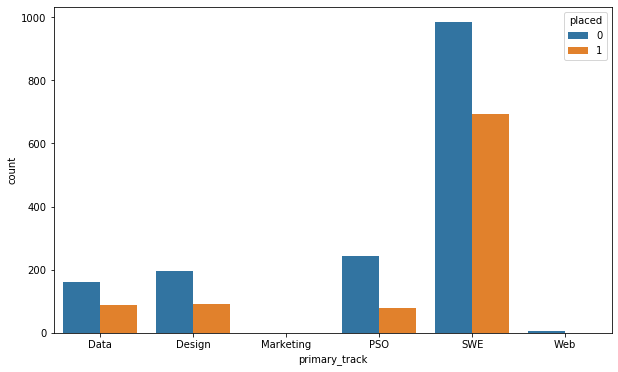

In [42]:
#Here, we can see which track has been most succesful in placement rate

plt.figure(figsize = (10,6))
sns.countplot(x = 'primary_track', hue = 'placed', data = data)

We can see that SWE is the most popular track with most number of fellows enrolling into this. Despite its large number, we can get an idea that most student in SWE get placed, keeping in mind that this data contains currently active students.

To get an accurate idea of each performance, I will find the placement ratio below for the top 4 tracks at XYZ!

In [43]:
#Finding out the ratio of people who were placed in each track inclusive of the currently active students

#SWE TRACK PLACEMENT RATIO
swe_total = len(data[data['primary_track'] == 'SWE']) 
swe_placed = len(data[(data['primary_track'] == 'SWE') & (data['placed'] == 1)])
swe_placement_ratio = swe_placed / swe_total
print("The percentage of people ultimately placed from SWE track is: " + str(round((swe_placement_ratio * 100),2)) +"%")


#DATA TRACK PLACEMENT RATIO
data_total = len(data[data['primary_track'] == 'Data']) 
data_placed = len(data[(data['primary_track'] == 'Data') & (data['placed'] == 1)])
data_placement_ratio = data_placed / data_total
print("The percentage of people ultimately placed from Data track is: " + str(round((data_placement_ratio * 100),2)) +"%")


#DESIGN TRACK PLACEMENT RATIO
design_total = len(data[data['primary_track'] == 'Design']) 
design_placed = len(data[(data['primary_track'] == 'Design') & (data['placed'] == 1)])
design_placement_ratio = design_placed / design_total
print("The percentage of people ultimately placed from Design track is: " + str(round((design_placement_ratio * 100),2)) +"%")



#PRODUCT TRACK PLACEMENT RATIO
product_total = len(data[data['primary_track'] == 'PSO']) 
product_placed = len(data[(data['primary_track'] == 'PSO') & (data['placed'] == 1)])
product_placement_ratio = product_placed / product_total
print("The percentage of people ultimately placed from Data track is: " + str(round((product_placement_ratio * 100),2)) +"%")





The percentage of people ultimately placed from SWE track is: 41.36%
The percentage of people ultimately placed from Data track is: 35.48%
The percentage of people ultimately placed from Design track is: 31.94%
The percentage of people ultimately placed from Data track is: 24.84%


<b> Insight:

Keeping in mind that current students haven't been placed yet and including them in the analysis, we see that SWE has the highest placement ratio overall. However, I believe that DATA and DESIGN tracks are actually performing better with the significantly lower number of fellows in these tracks. If they had the same amount of fellows as SWE, Design and Data could in fact potentially have a greater placement ratio than SWE. </b>





<b> RECCOMENDATION:
    
With this simple analysis, XYZ should also consider acquiring more students from the Data and Design tracks in order to achieve a much higher placement rate!

### Which track has most fellows who do not continue with the program? 


Looking at the business model of XYZ, I would believe that those fellows who do not continue with XYZ could be seen as loss in business revenue / income. So, I would suggest it is vital to see where things are going wrong / where people choose to discontinue with XYZ. 

<b> NOTE: For this analysis, I will take data only from those who withdrew or took a break on their own will, and XYZ did not terminate their contract 

In [45]:
discontinued_fellows = data[(data['XYZ_status'] == 'Break') | (data['XYZ_status'] == 'Closed Lost') |
                           (data['XYZ_status'] == 'Deferred') | (data['XYZ_status'] == 'MIA') |
                           (data['XYZ_status'] == 'Withdrawn (Trial)') | (data['XYZ_status'] == 'Withdrawn')]

In [46]:
discontinued_fellows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 2 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   XYZ_status                   974 non-null    category
 1   primary_track                974 non-null    category
 2   program_duration_days        890 non-null    float64 
 3   placed                       974 non-null    category
 4   employment_status            974 non-null    category
 5   highest_level_of_education   974 non-null    category
 6   length_of_job_search         974 non-null    category
 7   biggest_challenge_in_search  974 non-null    category
 8   professional_experience      974 non-null    category
 9   work_authorization_status    974 non-null    category
 10  number_of_interviews         974 non-null    float64 
 11  number_of_applications       974 non-null    int64   
 12  gender                       974 non-null    category
 13  race

In [47]:
discontinued_fellows.head(4)
discontinued_fellows.tail(4)

,XYZ_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2529,Closed Lost,SWE,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Technical interviewing,Less than one year,Citizen,5.0,45,Female,Non-Hispanic White or Euro-American
2535,Closed Lost,PSO,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20,Decline to Self Identify,South Asian or Indian American
2538,Withdrawn,SWE,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American
2543,Withdrawn,SWE,285.0,0,Student,Master's Degree,1-2 months,Hearing back on my applications,1-2 years,Green Card,3.0,70,Male,Non-Hispanic White or Euro-American


<b> Which track has most number of discontinuted fellows?

In [48]:
#Value count of discontinued fellows per track
discontinued_fellows['primary_track'].value_counts()

SWE          617
PSO          153
Design       114
Data          86
Web            3
Marketing      1
Name: primary_track, dtype: int64

SWE leads the way in these numbers, but that doesn't truly give us a lot of information because there are more fellows being enrolled for SWE

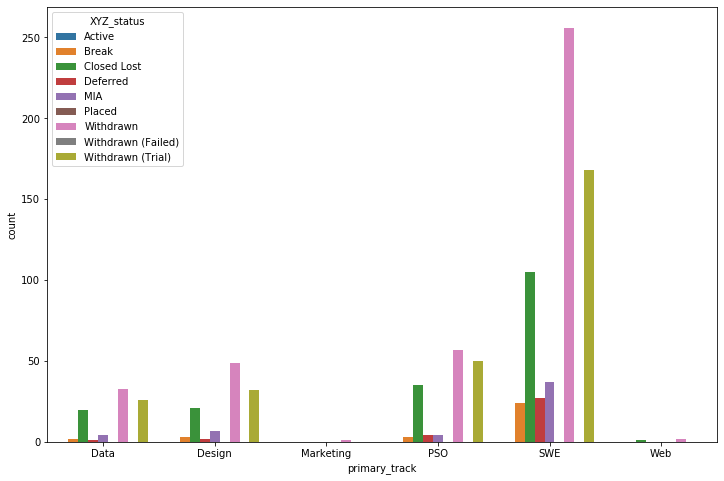

In [50]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'primary_track', hue = 'XYZ_status', data = discontinued_fellows)

<b> <u> INSIGHT: </u> </b>
    
I find the trend that most people in each track withdrew from the program after due to not being active or some other reason, and withdrew from the program after the free trial. This is the common trend across all the tracks available atXYZ. Another important thing to note is that XYZ is losing fellows who aren't acceping the XYZ offer which could be a result of a lot of circumstancial and personal things. 



<b> <u> RECOMMENDATION: </u> </b>

a) Since XYZ seems to losing a lot of business and revenue due to fellows being withdrawn after joining (either trial or later), and some cases not accepting the initial offer, I would recommend XYZ take steps in understanding why fellows are withdrawing themselves? This could be done by asking them a survey after withdrawing:

1. Why are they withdrawing? Reason? Are they not finding valuable information? 
2. What could be made better?
3. What additional resource can XYZ provide?

b) It is clear that the 2 week trial period attracts a lot of fellows to the program. Therefore, retention after the 2 weeks is key. The course curriculum could be structured in a way that the first 2 weeks provides just enough information for the fellows to be interested and be curious that the next 6 weeks will provide enough resources for landing a job convincing them to stay. 

c) Another way is to analyze if XYZ is providing too many resources in the first 2 weeks and fellows start to think this could be enough for them to land a job themselves.

d) Analyze the job market and scenario to understand why people would not accept the offer in the first place? Marketing strategies to attract more job seekers to use XYZ's service.


<b> <u> CONCLUSION: </u> </b>: FELLOW RETENTION IS KEY TO XYZ'S GROWTH AND BUSINESS 


### Does a fellow's professional, educational, and personal background play a role in him getting placed through XYZ?


We already know that higher education and years of experience plays a key role in landing a job. But is the curriculum of XYZ helping them? Who is benefitting the most? Which people to target and enroll into XYZ?


<b> Note: I do not want to consider currently active fellows at XYZ. Only looking at past history.

In [51]:
exclude_current = data[data['XYZ_status'] != 'Active']

In [52]:
exclude_current.head(3)

,XYZ_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,Closed Lost,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,Closed Lost,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


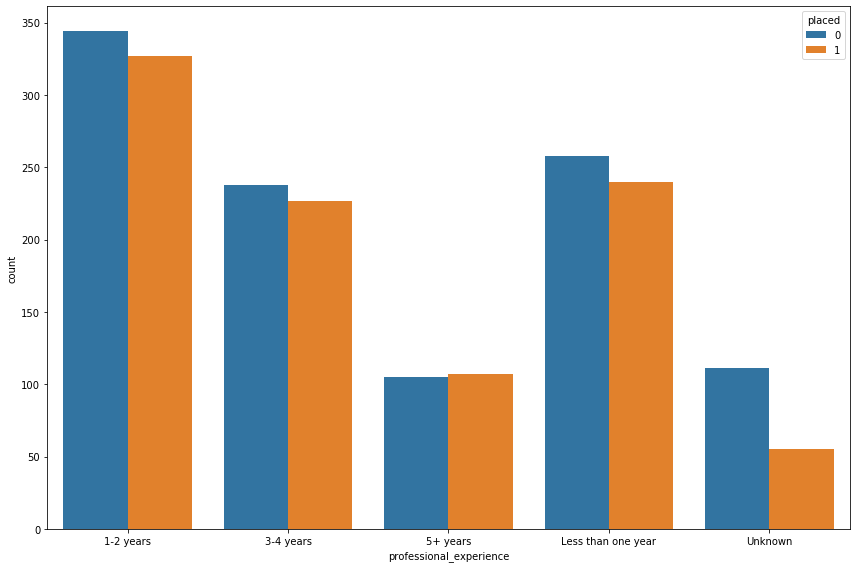

In [53]:
#Let us see the relationship between years of experience and placement

plt.figure(figsize = (12,8))
sns.countplot(x = 'professional_experience', hue = 'placed', data = exclude_current)
plt.tight_layout()

From this graph, we see that XYZ is actually doing a great job with fellows across various years of work experience. However, they perform best for those with significant experience, as expected. 

That is inconclusive as majority of the market segment consists of those candidates looking for jobs and they have lesser experience.


<b> Recommendation: </b>  Make professional experience a required field in the application to XYZ. A lot of information is lost since many are unknown.  

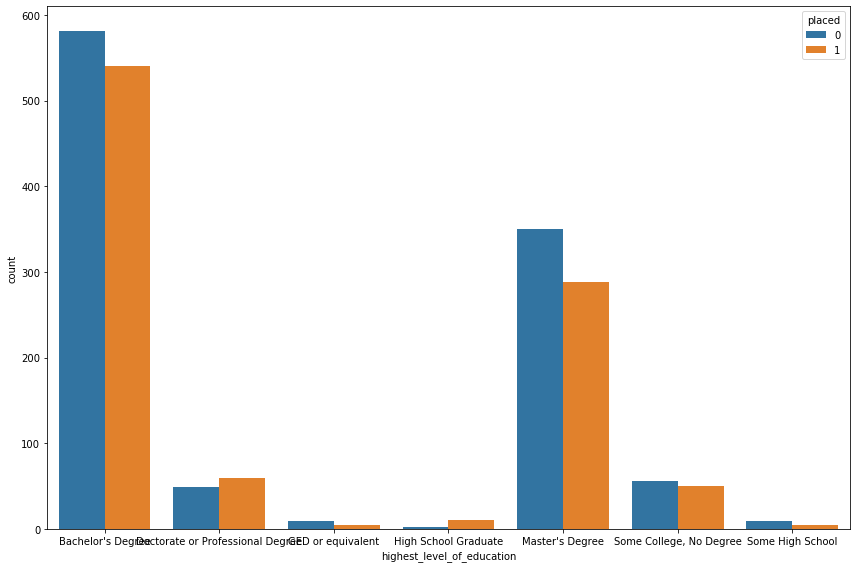

In [54]:
# Does the educational degree play a vital role?
plt.figure(figsize = (12,8))
sns.countplot(x = 'highest_level_of_education', hue = 'placed', data = exclude_current)
plt.tight_layout()


Those who hold a advanced degree clearly are getting placed at a higher rate. Others are also being placed but the ratio of placement to non-placement is slightly worse off. 

<b> Recommendation: Target more fellows with a professional degree or equivalent to enter into XYZ. 

<b> <u> Does a person's visa status play a key role in landing a job? </u>

In [55]:
#Here, I will classify the work authorization status as either Citizen or not citizen for convenience,
#Also do not consider currently active fellows

visa_status = exclude_current.copy()


In [56]:
visa_status['work_authorization_status'].replace(dict.fromkeys(['F1 Visa/OPT','Green Card','F1 Visa/CPT','Other','H1B','Canada Citizen','STEM OPT',
                                                                'Not Authorized'], 'Non-Citizen'), inplace = True)

In [57]:
visa_status['work_authorization_status'].value_counts()

Citizen        1097
Non-Citizen     915
Name: work_authorization_status, dtype: int64

There were 1097 citizens and 915 non-citizens in the past, excluding the current XYZ fellows.

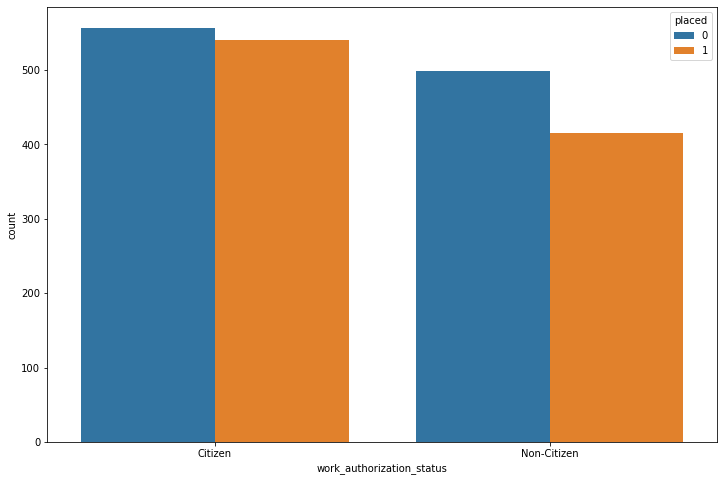

In [58]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'work_authorization_status', hue = 'placed', data = visa_status)

<b> <u> INSIGHT: </u></b>

Excluding the currently active fellows, we see that those who are citizens of USA have been placed at a significant higher rate compared to those who were non-citizens.

<b> <u> RECOMMENDATION: </u></b>

Try having a balance of higher citizens being enrolled to have that assurance of placement. This is because of the current visa issues where companies do not want to sponsor work visa, especially during these uncertain times with immigration news and the world economy due to COVID-19

<b> What kind of fellows usually want to join XYZ?

In [59]:
data['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         1026
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
Name: biggest_challenge_in_search, dtype: int64

Most people are those who find it difficult to hear back on their applications. This confirms that XYZ is recruiting the correct fellows to help land their dream job. Once again, this could have a lot of bias since it is self reported. But overall, it looks like the target audience is being reached.

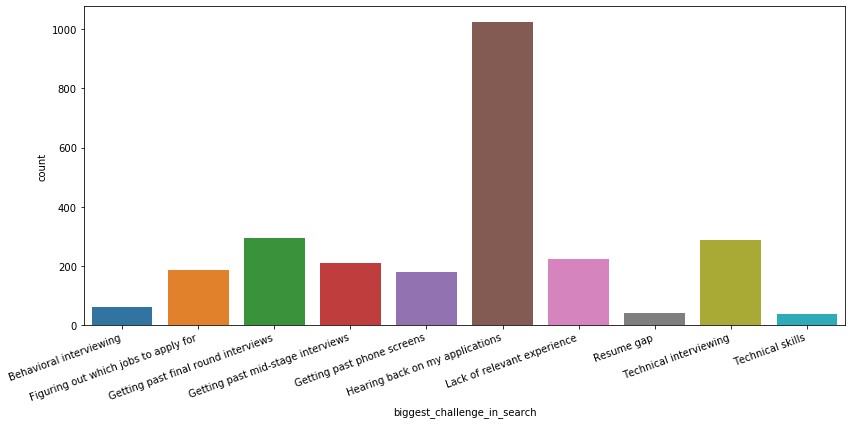

In [60]:
plt.figure(figsize  = (12,6))
ax = sns.countplot(x = 'biggest_challenge_in_search', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.tight_layout()
plt.show()

This analysis seems right as XYZ teaches specific techniques for a higher conversion rate. 

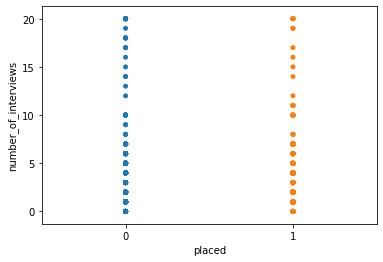

In [61]:
#Relationship between number of interviews and applications before to placement?

sns.stripplot(y = 'number_of_interviews', x = 'placed', data = data)

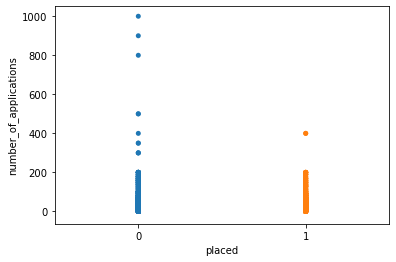

In [62]:
sns.stripplot(y = 'number_of_applications', x = 'placed', data = data)

<b> Insight: </b> We do not see a clear distribution or difference between number of applications and number of interviews before entering XYZ and whether or not they've been placed. There are certainly some outliers.

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise, our machine learning algorithm won't be able to directly take in those features as inputs.

In [63]:
#Convert work authorization status to binary classification to make it simple: Citizen or Not Citizen

data['work_authorization_status'].replace(dict.fromkeys(['F1 Visa/OPT','Green Card','F1 Visa/CPT','Other','H1B','Canada Citizen','STEM OPT',
                                                                'Not Authorized'], 'Non-Citizen'), inplace = True)


In [64]:
#Look at the categorical features
data.dtypes

XYZ_status                     category
primary_track                  category
program_duration_days           float64
placed                         category
employment_status              category
highest_level_of_education     category
length_of_job_search           category
biggest_challenge_in_search    category
professional_experience        category
work_authorization_status        object
number_of_interviews            float64
number_of_applications            int64
gender                         category
race                           category
dtype: object

### Creating Dummy Variables 

In [65]:
status = pd.get_dummies(data['XYZ_status'], drop_first = True)
track  = pd.get_dummies(data['primary_track'], drop_first = True)
emp_status = pd.get_dummies(data['employment_status '], drop_first=True)
education = pd.get_dummies(data['highest_level_of_education'], drop_first=True)
search_length = pd.get_dummies(data['length_of_job_search'], drop_first = True)
challenge = pd.get_dummies(data['biggest_challenge_in_search'], drop_first = True)
experience = pd.get_dummies(data['professional_experience'], drop_first = True)
auth_status = pd.get_dummies(data['work_authorization_status'], drop_first = True)



<b> <u> ASSUMPTION: </u></b>

Assuming a non-biased system where gender and race do not play a role. I will remove these two variables 

In [66]:
#Remove Gender and Race variables to be non-biased along with other variables for which dummies were created

data.drop(['XYZ_status', 'primary_track','employment_status ','highest_level_of_education','length_of_job_search',
          'biggest_challenge_in_search','professional_experience','work_authorization_status','gender','race'], axis = 1,
         inplace = True)

In [67]:
#Add the dummies to the data

data = pd.concat([data, status, track, emp_status, education, search_length, challenge, experience, auth_status], axis = 1)

In [68]:
data.drop(['Unknown','Unknown'], axis = 1, inplace = True)

In [69]:
data[data['placed'] == 1]

,program_duration_days,placed,number_of_interviews,number_of_applications,Break,Closed Lost,Deferred,MIA,Placed,Withdrawn,...,Getting past phone screens,Hearing back on my applications,Lack of relevant experience,Resume gap,Technical interviewing,Technical skills,3-4 years,5+ years,Less than one year,Non-Citizen
4,89.0,1,10.0,100,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
23,193.0,1,5.0,4,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
30,73.0,1,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
39,83.0,1,2.0,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
54,76.0,1,0.0,30,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,31.0,1,6.0,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2528,277.0,1,2.0,45,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
2531,310.0,1,0.0,6,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2533,33.0,1,0.0,9,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [70]:
#We do not want to train the model based on status of the fellow as well. What if this model is to be used on a new fellow?
# It will always give 100 % accuracy then

data.drop(['Break','Closed Lost','Deferred','MIA','Withdrawn','Withdrawn (Failed)','Withdrawn (Trial)','Placed'], axis =1 ,
         inplace = True)

In [71]:
data.columns

Index(['program_duration_days', 'placed', 'number_of_interviews',
       'number_of_applications', 'Design', 'Marketing', 'PSO', 'SWE', 'Web',
       'Employed Full-Time', 'Employed Part-Time', 'Student', 'Unemployed',
       'Doctorate or Professional Degree', 'GED or equivalent',
       'High School Graduate', 'Master's Degree', 'Some College, No Degree',
       'Some High School', '3-5 months', '6 months to a year',
       'Less than one month', 'Over a year',
       'Figuring out which jobs to apply for',
       'Getting past final round interviews',
       'Getting past mid-stage interviews', 'Getting past phone screens',
       'Hearing back on my applications', 'Lack of relevant experience',
       'Resume gap', 'Technical interviewing', 'Technical skills', '3-4 years',
       '5+ years', 'Less than one year', 'Non-Citizen'],
      dtype='object')

In [72]:
#Since it is self reported data, and may not always reflect or affect the model, we can remove the challenges faced too.

data.drop(['Figuring out which jobs to apply for','Getting past final round interviews','Getting past mid-stage interviews',
          'Getting past phone screens', 'Hearing back on my applications','Lack of relevant experience',
          'Resume gap','Technical interviewing', 'Technical skills'], axis = 1 , inplace = True)

In [73]:
data.head(20)  #Data is ready for modeling

,program_duration_days,placed,number_of_interviews,number_of_applications,Design,Marketing,PSO,SWE,Web,Employed Full-Time,...,"Some College, No Degree",Some High School,3-5 months,6 months to a year,Less than one month,Over a year,3-4 years,5+ years,Less than one year,Non-Citizen
0,NaN,0,2.0,900,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,NaN,0,6.0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.0,0,5.0,25,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,89.0,1,10.0,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0,5.0,100,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
6,0.0,0,0.0,9,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
7,19.0,0,4.0,15,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,NaN,0,1.0,5,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9,13.0,0,0.0,10,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0


## Modeling

### Predicting whether or not fellow will be placed  (Logistic Regression)

To predict whether or not a fellow will be placed, we do not require to train the model with the currently active students as it does not make sense, and their program duration days are null. Therefore, we can remove them from the training set completely

<b> <u> ASSUMPTION: </u> </b> 
We predict whether or not a fellow will be placed prior to the fellow joining, and not use this model for those fellows who are already in the pathrise program

In [74]:
current_active = data[data.isnull().any(axis = 1)].copy()

In [75]:
#Drop current active fellows from our data

df = data.dropna()
df.drop('program_duration_days', axis = 1, inplace = True)

C:\Users\dell\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
#Now we can use this data 
df.head()

,placed,number_of_interviews,number_of_applications,Design,Marketing,PSO,SWE,Web,Employed Full-Time,Employed Part-Time,...,"Some College, No Degree",Some High School,3-5 months,6 months to a year,Less than one month,Over a year,3-4 years,5+ years,Less than one year,Non-Citizen
2,0,0.0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,5.0,25,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10.0,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,5.0,100,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
6,0,0.0,9,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


We use a Logistic Regression Model for predicting whether or not a person will be placed

In [77]:
#Train Test Split
from sklearn.model_selection import train_test_split



In [78]:

X = df.drop('placed', axis = 1)  #Independent variables
y = df['placed'] #To be predicted

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 101)

In [79]:
#Training and predicting

from sklearn.linear_model import LogisticRegression

In [80]:
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [81]:
predictions = logmodel.predict(X_test)  #Predictions
predictions

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

#### Model evaluation (Logistic Regression)

We can check precision,recall,f1-score using classification report!

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
print(confusion_matrix(y_test, predictions))

[[110 155]
 [ 59 158]]


In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51       265
           1       0.50      0.73      0.60       217

    accuracy                           0.56       482
   macro avg       0.58      0.57      0.55       482
weighted avg       0.59      0.56      0.55       482



<b> <u> Analysis and Results </u></b>

We find an accuracy of 56% for this model in classyfying whether or not a fellow will be placed. Even though this might seem like a low number, there seems to be high variance in the data about which fellow will leave or withdraw, and which fellow will continue with the progr

One alarming thing to notice is the high amount of False Negative in our confusion matrix. This suggests that the model is classifying more fellows as not being able to get placed where infact they were placed.

The model will learn better as XYZ grows and we get more data.

<b> Recommendation </b> 
Since each person's behavior is different, and due to the high chance of a model predicting a fellow to not be placed, this is where XYZ can use interviews and the domain expertise of data scientists to make a judgment on a fellow's placement chances, as it would all depend on a lot of external factors like economy, job openings etc.

### Predicting whether or not fellow will be placed  (Support Vector Classifier)

In [85]:
from sklearn.svm import SVC

In [86]:
model = SVC()

In [87]:
model.fit(X_train, y_train)

SVC()

In [88]:
predictions_svc = model.predict(X_test)

In [89]:
print(confusion_matrix(y_test,predictions_svc))  #Poor Performance so lets use Grid Search CV

[[ 12 253]
 [  7 210]]


In [90]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [93]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.509, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.512, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.505, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.538, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.561, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.540, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.533, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.522, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.538, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.529, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.588, total=   0.5s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.519, total=   0.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.524, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.526, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.495, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.564, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.516, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   49.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [94]:
grid_predictions = grid.predict(X_test)

In [95]:
print(confusion_matrix(y_test,grid_predictions))

[[113 152]
 [ 83 134]]


In [96]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.58      0.43      0.49       265
           1       0.47      0.62      0.53       217

    accuracy                           0.51       482
   macro avg       0.52      0.52      0.51       482
weighted avg       0.53      0.51      0.51       482



<b><u> Analysis and results </u></b>

The peformance of Support Vector Machines seem to be worse than the Logistic Regression Model. Therefore, in this case I will use the Logistic Regression model to predict whether or not a fellow will be placed.

### Predicting expected days for a fellow to be placed  (Regression)

<b> <u> Note: </u> </b>

Here, we need to predict the number of days in program. For this, we will have to exclude those who are currently in the program because for them the data is missing. It is important to count even the values of 0 days because it can give us an idea if a fellow will reject our offer to join Pathrise. 

In [97]:
#Set up data in a correct way

df2 = data.dropna()   #We do not require currently active users as their data is missing

In [98]:
df2.head()

,program_duration_days,placed,number_of_interviews,number_of_applications,Design,Marketing,PSO,SWE,Web,Employed Full-Time,...,"Some College, No Degree",Some High School,3-5 months,6 months to a year,Less than one month,Over a year,3-4 years,5+ years,Less than one year,Non-Citizen
2,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.0,0,5.0,25,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,89.0,1,10.0,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0,5.0,100,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
6,0.0,0,0.0,9,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1


In [99]:
df2 = df2.astype(int)

In [100]:

X = df2.drop('program_duration_days', axis = 1)
y = df2['program_duration_days']

In [101]:
#Import Li

from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [103]:
model2.fit(X_train, y_train)

LinearRegression()

In [727]:
coeff_df = pd.DataFrame(model2.coef_,X.columns,columns=['Coefficient'])  #Coeffients of parameters
coeff_df

,Coefficient
placed,48.786056
number_of_interviews,-1.389019
number_of_applications,-0.140412
Design,-2.730931
Marketing,0.463856
PSO,-20.270692
SWE,-6.902813
Web,-11.455638
Employed Full-Time,12.155318
Employed Part-Time,-2.753540


In [104]:
pred = model2.predict(X_test) 

In [105]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 127.67123907078405


In [106]:
results = pd.DataFrame({'Actual': y_test, 'Predicted':pred})
results

,Actual,Predicted
2339,91,114.811391
76,143,150.896277
1087,12,119.866723
1975,0,93.936833
82,233,129.151630
...,...,...
2091,7,102.097095
2445,12,108.287636
1691,10,108.512104
747,159,183.796293


<b> <u> Analysis and Results </u></b>

Here, we find the RMSE to be 127.61 days because of the high amount of variance that already exists in the data. This is once again a poor performance because many fellows are withdrawing after the trial period. Therefore, I believe it is reasonable considering the number of 0 days value that we have in our data. 

CONCLUSION: The model actually predicts reasonably well for those fellows who continute to stay beyond the 2 week trial period. Inclusion of that in the dataset is bringing down the overall performance. However, I beleive XYZ should always focus on the expected days for a person to be placed rather than predicting whether or not the person would continute after the trial period